In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Reading the data

csv = "Logistic_regression.csv"
data = pd.read_csv(csv, nrows= 1000)

In [8]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10000.0,60 months,17.86,253.18,D,D5,property manager,5 years,MORTGAGE,40000.0,...,11.0,0.0,9023.0,52.5,20.0,f,INDIVIDUAL,2.0,0.0,Unit 3163 Box 3968\r\nDPO AE 70466
996,9000.0,36 months,6.49,275.81,A,A2,Communications Manager,< 1 year,RENT,96000.0,...,16.0,0.0,17017.0,30.4,61.0,f,INDIVIDUAL,2.0,0.0,"6360 Louis Path\r\nHallfort, MD 22690"
997,5600.0,36 months,8.90,177.82,A,A5,Grasmere Place,4 years,MORTGAGE,65000.0,...,11.0,0.0,21409.0,92.7,26.0,f,INDIVIDUAL,3.0,0.0,"50797 Sonya Lights Suite 500\r\nJessicastad, R..."
998,25000.0,60 months,19.72,658.46,D,D5,bed bath & beyond,2 years,RENT,79980.0,...,9.0,0.0,9706.0,69.8,16.0,f,INDIVIDUAL,0.0,0.0,"8598 West Heights Apt. 257\r\nAnnaberg, TX 00813"


In [9]:
# shape of dataset 
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])


Number of rows:  1000
Number of columns:  27


In [10]:
# check the distribution of the outcome labels
data["loan_status"].value_counts(normalize = True)*100

Fully Paid     82.1
Charged Off    17.9
Name: loan_status, dtype: float64

In [11]:
# Statistical summary of the dataset
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,1000.0,NaN,NaN,NaN,14513.925,8214.634315,1000.0,8381.25,12500.0,20000.0,35000.0
term,1000,2,36 months,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,1000.0,NaN,NaN,NaN,13.61905,4.500899,5.32,10.565,13.11,16.29,28.99
installment,1000.0,NaN,NaN,NaN,445.32733,247.333974,31.06,267.5675,400.795,578.195,1275.46
grade,1000,7,B,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,1000,35,B4,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,944,825,Teacher,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,955,11,10+ years,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,1000,3,MORTGAGE,476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,1000.0,NaN,NaN,NaN,74581.02095,49308.989278,12000.0,45000.0,65000.0,88125.0,710000.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             1000 non-null   float64
 1   term                  1000 non-null   object 
 2   int_rate              1000 non-null   float64
 3   installment           1000 non-null   float64
 4   grade                 1000 non-null   object 
 5   sub_grade             1000 non-null   object 
 6   emp_title             944 non-null    object 
 7   emp_length            955 non-null    object 
 8   home_ownership        1000 non-null   object 
 9   annual_inc            1000 non-null   float64
 10  verification_status   1000 non-null   object 
 11  issue_d               1000 non-null   object 
 12  loan_status           1000 non-null   object 
 13  purpose               1000 non-null   object 
 14  title                 997 non-null    object 
 15  dti                   

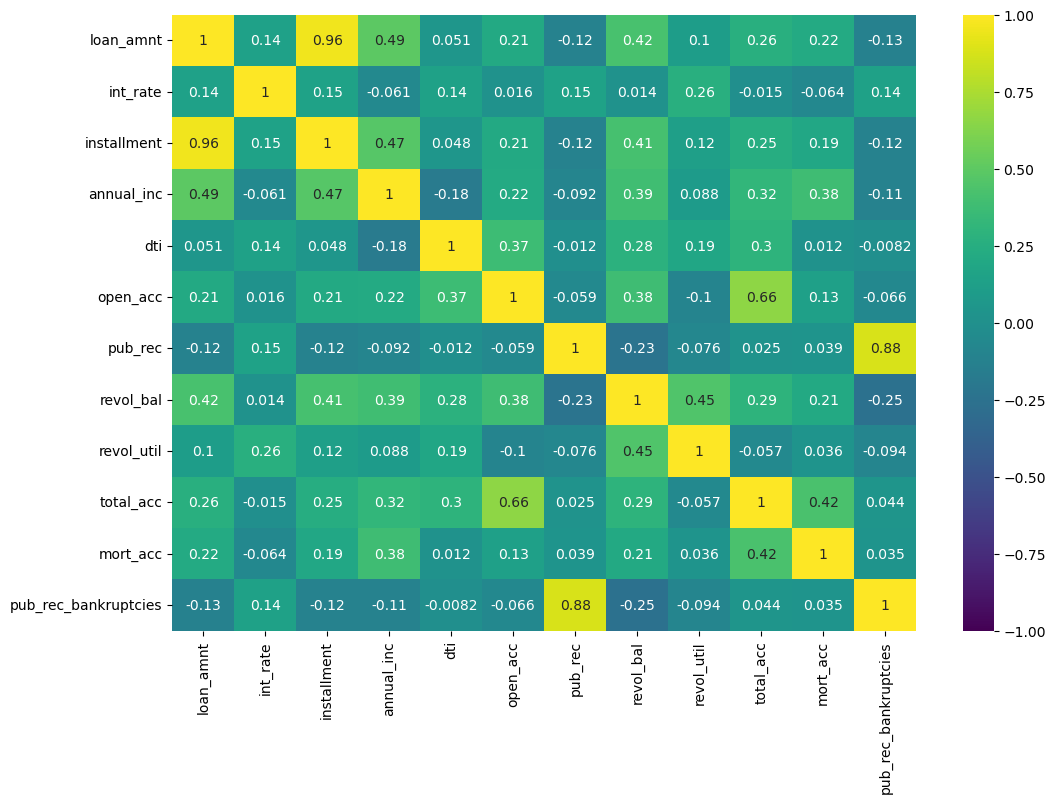

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method="spearman"),vmax=1,vmin=-1,annot=True,cmap='viridis')
plt.show()

We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

**.** installment: The monthly payment owed by the borrower if the loan originates.

**.** loan_amnt: This listed amount of the loan applied for by the borrower. If at some point in the time, the credit department reduces the loan amount, then it will be reflected in this value.

So, we can drop either one of those columns.

In [14]:
data.drop(columns=["installment"],axis = 1,inplace=True)

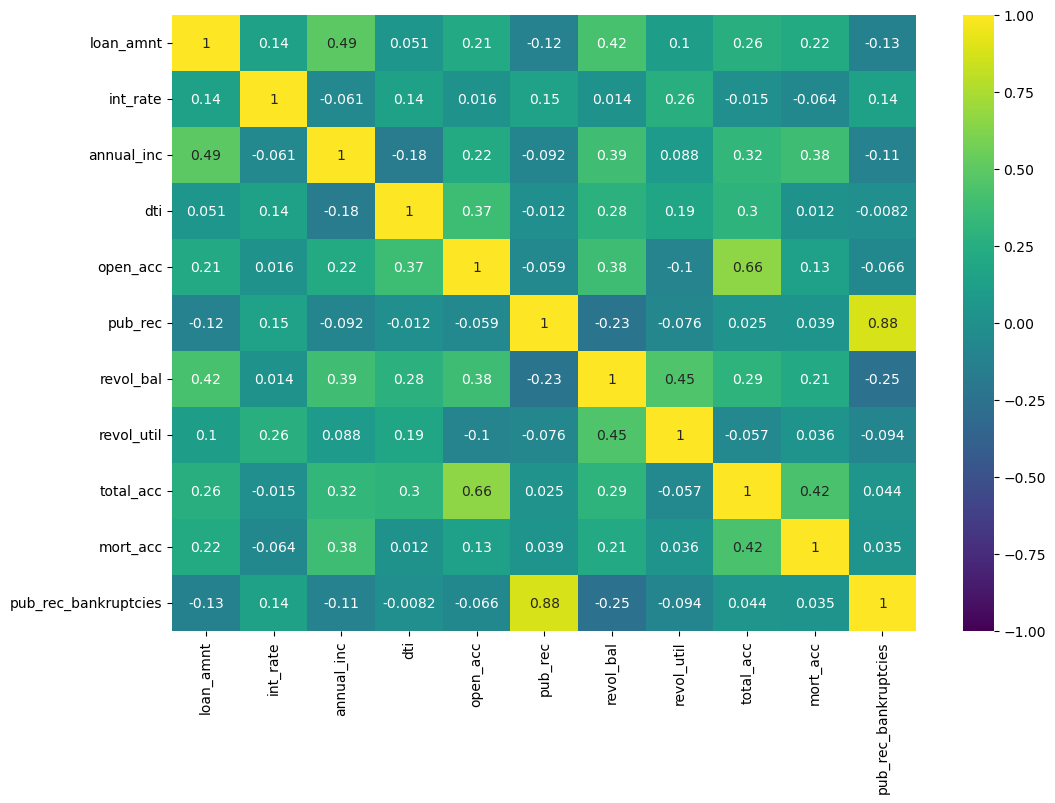

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method="spearman"),vmax=1,vmin=-1,annot=True,cmap='viridis')
plt.show()

# Data Exploration

1. The number of people who have paid fully and the number of people who are charged off 

In [16]:
data.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,179.0,14885.614525,8291.442499,2000.0,8912.5,12800.0,20000.0,35000.0
Fully Paid,821.0,14432.886724,8200.644554,1000.0,8050.0,12500.0,20000.0,35000.0


2. The majority of ownership as Mortgage and Rent

In [17]:
data["home_ownership"].value_counts()

MORTGAGE    476
RENT        445
OWN          79
Name: home_ownership, dtype: int64

3. Combining the minority classes as "OTHERS"

In [18]:
data.loc[(data["home_ownership"] == "ANY") | (data["home_ownership"] == "NONE"), "home_ownership"]= "OTHERS"
data['home_ownership'].value_counts()

MORTGAGE    476
RENT        445
OWN          79
Name: home_ownership, dtype: int64

In [19]:
data['home_ownership'].replace({"OTHER": "OTHERS"}).value_counts()

MORTGAGE    476
RENT        445
OWN          79
Name: home_ownership, dtype: int64

In [20]:
# Checking the distribution of 'Other'
data.loc[data['home_ownership']=='OTHERS','loan_status'].value_counts()

Series([], Name: loan_status, dtype: int64)

4. Converting string to date-time format

In [21]:
data["issue_d"]= pd.to_datetime(data['issue_d'])
data['earliest_cr_line']= pd.to_datetime(data['earliest_cr_line'])

5. Saw some issues in title(Looks like it was filled manually and needs some fixing).


In [22]:
data['title'].value_counts()[:20]

Debt consolidation                379
Credit card refinancing           143
Home improvement                   43
Other                              35
Debt Consolidation                 25
debt consolidation                 14
Major purchase                     13
Car financing                      10
Consolidation                       9
Business                            8
consolidation                       6
Personal                            5
Loan                                5
Medical expenses                    5
Vacation                            4
Debt Consolidation Loan             4
Moving and relocation               4
CC Consolidation                    4
Credit Card Debt Consolidation      3
Credit Card Consolidation           3
Name: title, dtype: int64

In [23]:
data['title'] = data["title"].str.lower()

In [24]:
data['title'].value_counts()[:20]

debt consolidation           421
credit card refinancing      143
home improvement              48
other                         35
consolidation                 17
major purchase                14
car financing                 10
business                       8
loan                           5
personal                       5
debt consolidation loan        5
credit cards                   5
medical expenses               5
consolidate                    4
moving and relocation          4
credit card consolidation      4
vacation                       4
cc consolidation               4
consolidation loan             4
debt consolidation             3
Name: title, dtype: int64

# Visualization 

The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

So, from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

In [25]:
# Univariate (catagorical)

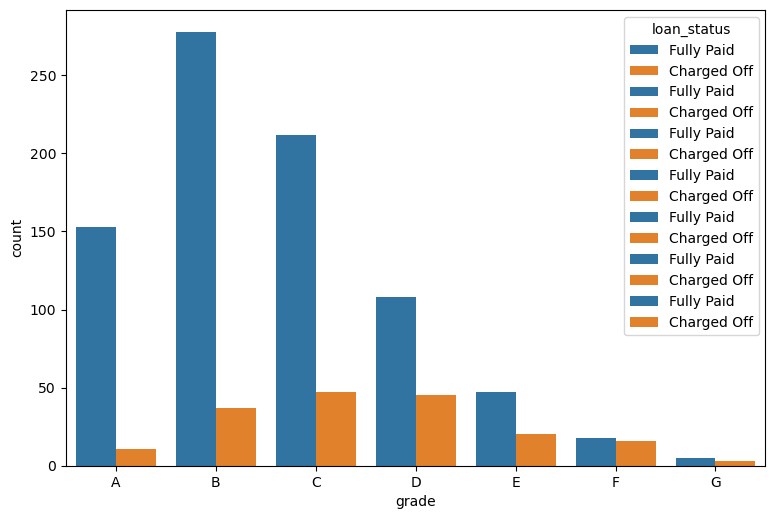

In [26]:
grade = sorted(data["grade"].unique().tolist())
t =1
plt.figure(figsize=(15,10))
for i in grade:
    plt.subplot(2,2,1)
    sns.countplot(x = "grade",data = data, hue= "loan_status", order= grade)
    t+=1
plt.tight_layout()
plt.show()       

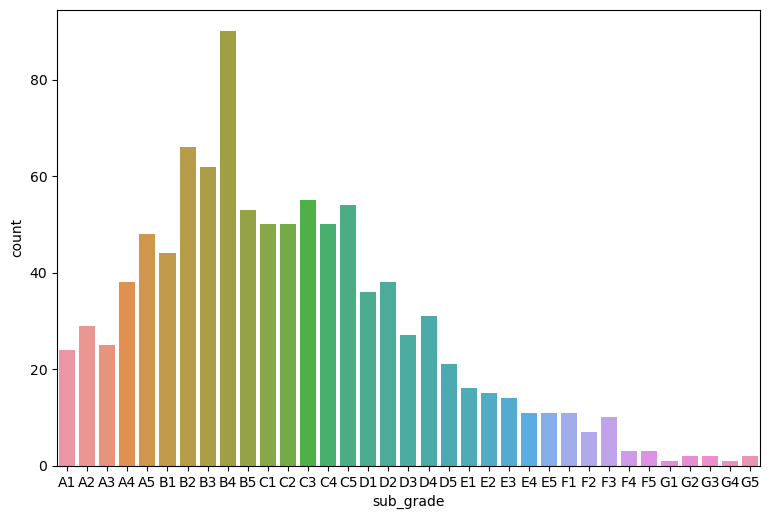

In [27]:
sub_grade = sorted(data["sub_grade"].unique().tolist())
t =1
plt.figure(figsize=(15,10))
for i in sub_grade:
    plt.subplot(2,2,1)
    sns.countplot(x = "sub_grade",data = data, order= sub_grade)
    t+=1
plt.tight_layout()
plt.show()       

In [28]:
# Bivariate Analysis

In [29]:
data.select_dtypes(include=np.number).columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [30]:
data.select_dtypes(include="object").columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [31]:
cols  = ['term','home_ownership',"verification_status",'purpose']

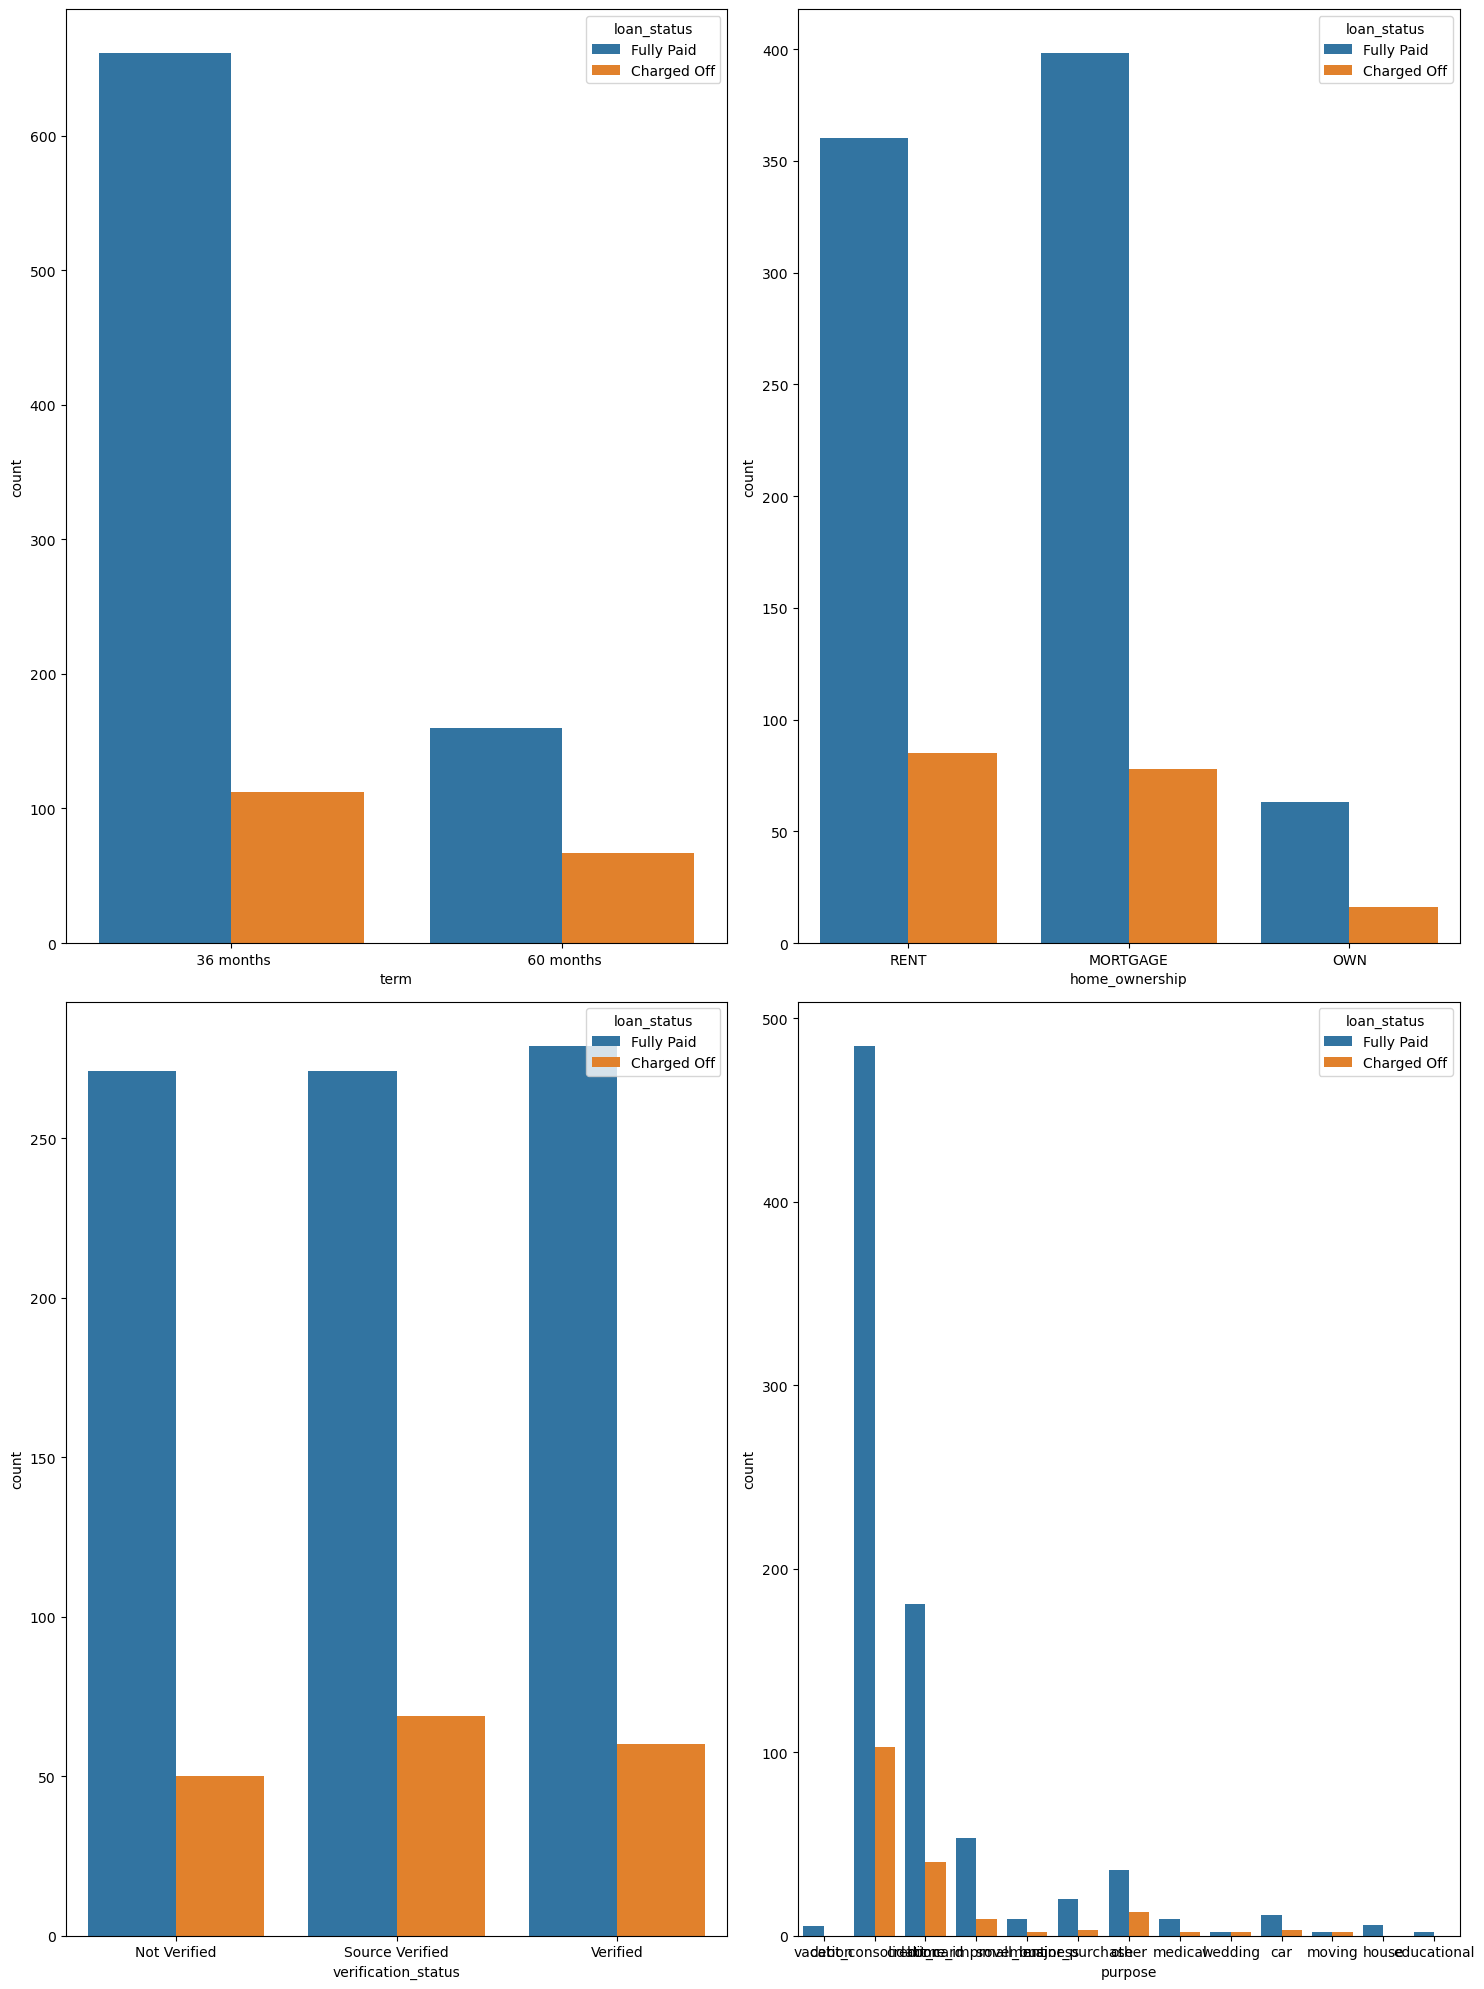

In [32]:
plt.figure(figsize=(15,20))

t =1
for i in cols:
    plt.subplot(2,2,t)
    sns.countplot(x = data.loc[:,i],data= data ,hue= "loan_status")
    t+=1
plt.tight_layout()
plt.show()      


In [33]:
data['emp_length'].value_counts()

10+ years    343
2 years       85
< 1 year      77
5 years       68
4 years       66
3 years       65
6 years       62
1 year        54
7 years       53
9 years       43
8 years       39
Name: emp_length, dtype: int64

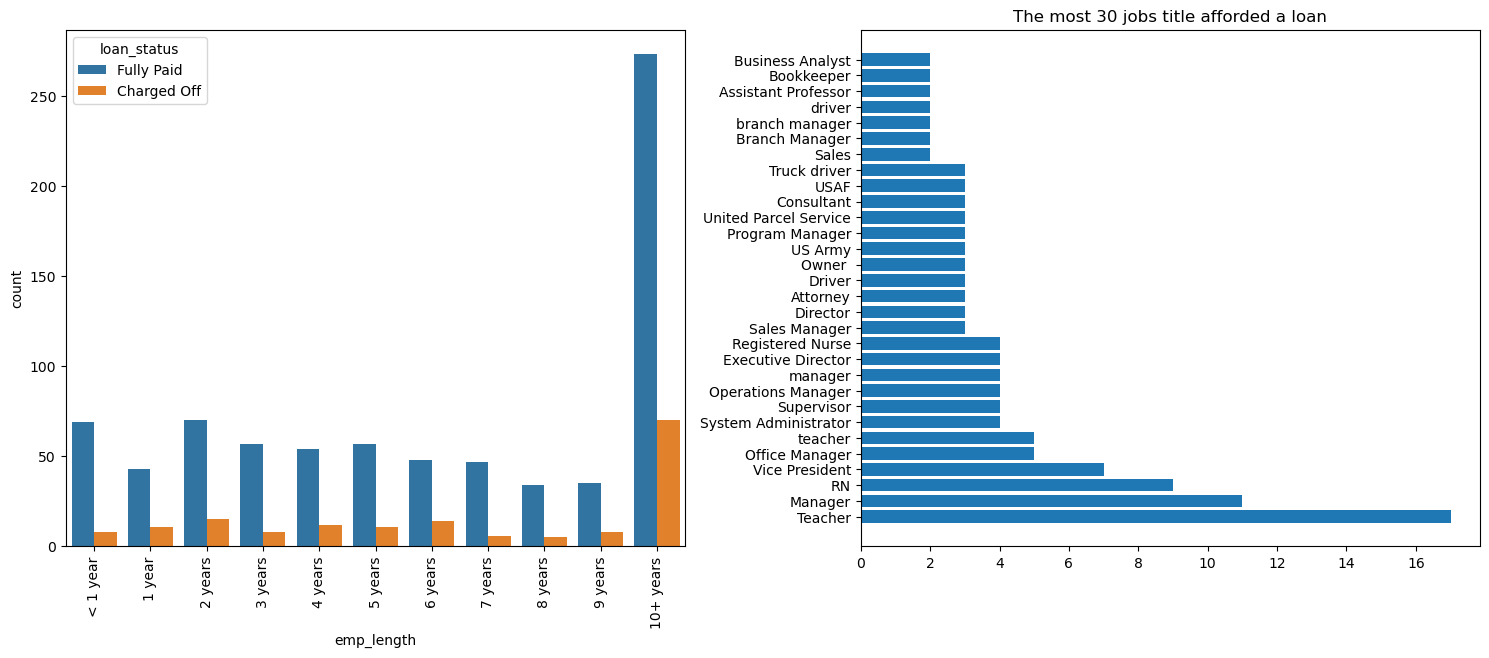

In [34]:
plt.figure(figsize=(15,12))


order = ['< 1 year','1 year','2 years','3 years','4 years', '5 years','6 years','7 years','8 years','9 years','10+ years']
plt.subplot(2,2,1)
g = sns.countplot(x= 'emp_length',data =data,hue = 'loan_status',order = order)
g.set_xticklabels(g.get_xticklabels(),rotation = 90)


plt.subplot(2,2,2)
plt.barh(data.emp_title.value_counts()[:30].index,data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()
plt.show()

In [35]:
# Manager and Teacher are the most afforded loan on titles

# Feature Engineering

In [36]:
# below are high outliers columns. we dont want to delete these records since someone whose taken a
# loan for the first time may have low bankruptucy record
# so in just flagging anything more than 0 as 1

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    

In [37]:
data["pub_rec"] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies']= data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

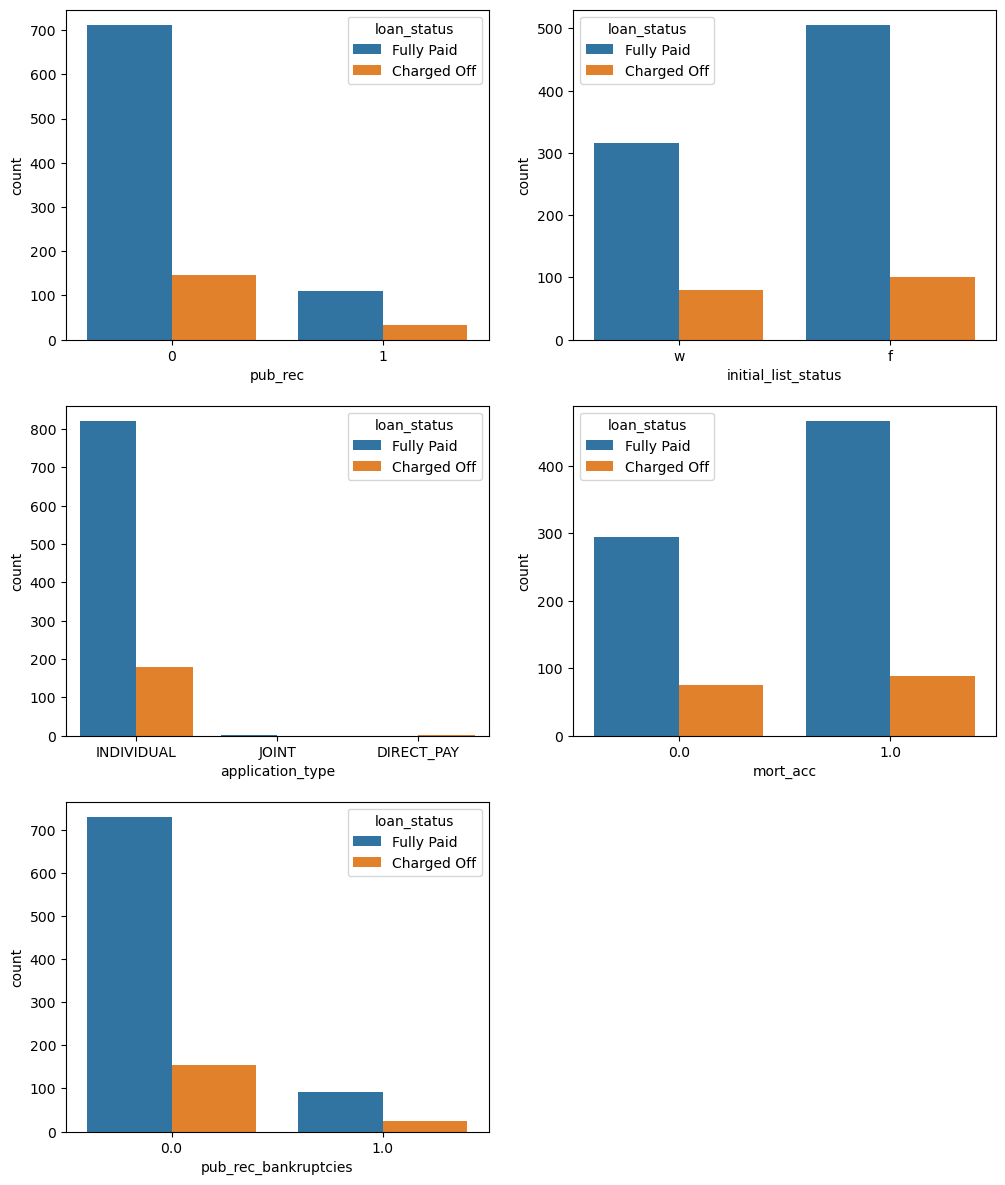

In [38]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=data,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=data,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=data,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=data,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=data,hue='loan_status')

In [39]:
# Mapping of target variable 
data['loan_status']=data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [40]:
data.isnull().sum()/len(data)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               5.6
emp_length              4.5
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.3
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                7.7
pub_rec_bankruptcies    0.1
address                 0.0
dtype: float64

## Mean Target Imputaion

In [41]:
data.groupby(by='total_acc').mean()

,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,
3.0,8000.000000,9.990000,14400.000000,1.000000,1.250000,3.000000,0.000000,368.000000,15.300000,NaN,0.000
4.0,6000.000000,12.420000,59000.000000,0.250000,5.747500,3.750000,0.000000,4750.750000,52.475000,0.000000,0.000
5.0,9760.714286,15.317143,54571.428571,0.142857,4.468571,3.714286,0.142857,4440.285714,42.614286,0.000000,0.000
6.0,11240.625000,13.838750,52609.375000,0.250000,12.275000,5.250000,0.125000,12488.250000,69.925000,0.285714,0.125
7.0,8247.916667,16.731667,39791.666667,0.333333,12.247500,5.500000,0.000000,5028.166667,51.300000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
62.0,33600.000000,16.290000,145000.000000,0.000000,11.240000,14.000000,0.000000,50348.000000,63.500000,1.000000,0.000
63.0,17500.000000,20.990000,67500.000000,0.500000,22.830000,23.500000,0.000000,24514.500000,35.800000,1.000000,0.000
67.0,23050.000000,6.030000,150000.000000,0.000000,11.440000,18.000000,0.000000,10201.000000,13.600000,1.000000,0.000


In [42]:
total_acc_avg=data.groupby(by='total_acc').mean().mort_acc
# saving mean of mort_acc according to total_acc_avg

In [43]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [44]:
data['mort_acc']=data.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [45]:
data.isnull().sum()/len(data)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               5.6
emp_length              4.5
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.3
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.1
pub_rec_bankruptcies    0.1
address                 0.0
dtype: float64

In [46]:
# Current no. of rows
data.shape

(1000, 26)

In [47]:
# Dropping rows with null values
data.dropna(inplace=True)


In [48]:
# Remaining no. of rows
data.shape

(939, 26)

## Outlier Detection & Treatment

In [49]:
numerical_data=data.select_dtypes(include='number')
num_cols=numerical_data.columns
len(num_cols)

12

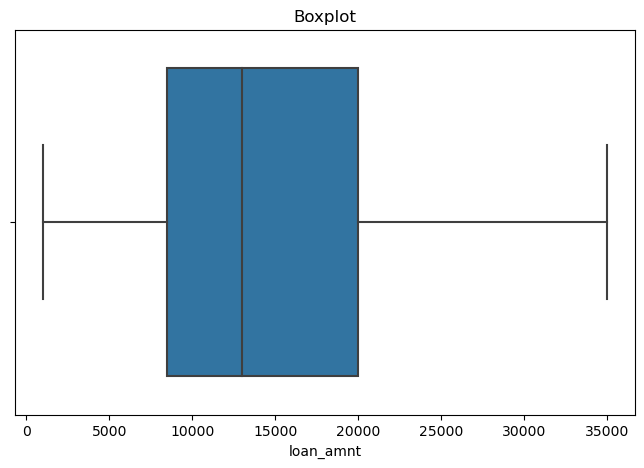

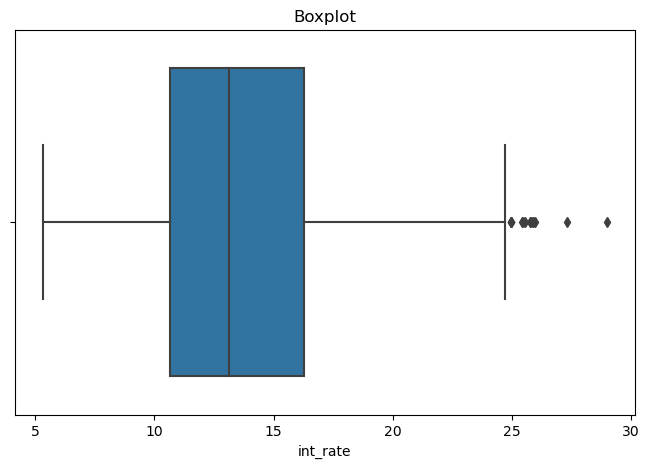

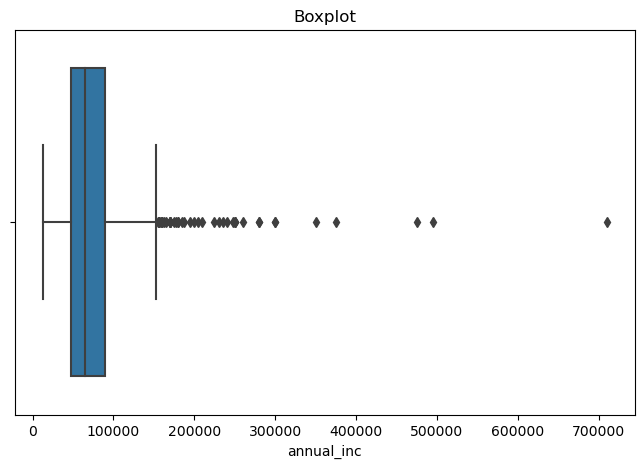

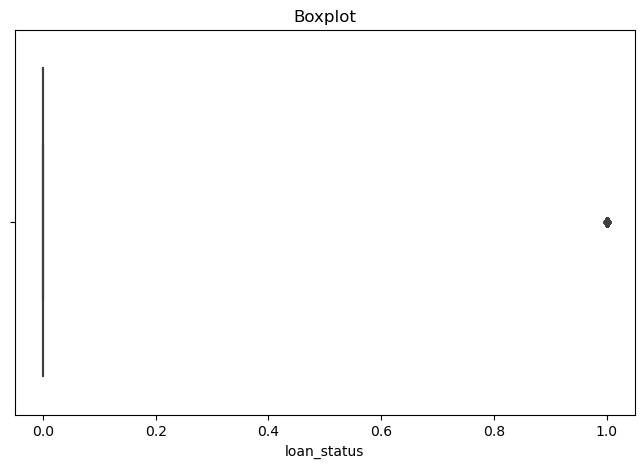

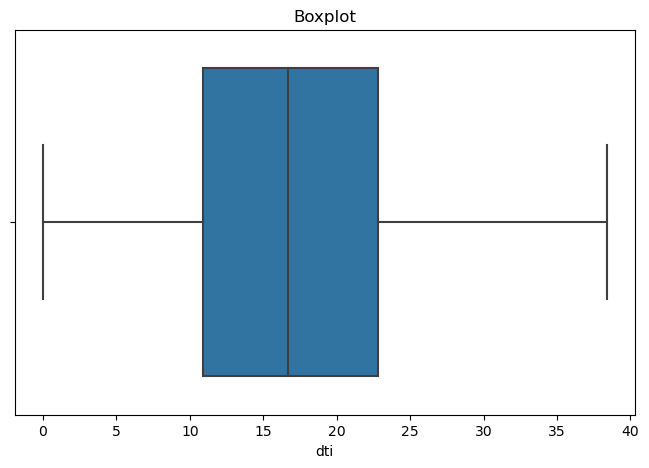

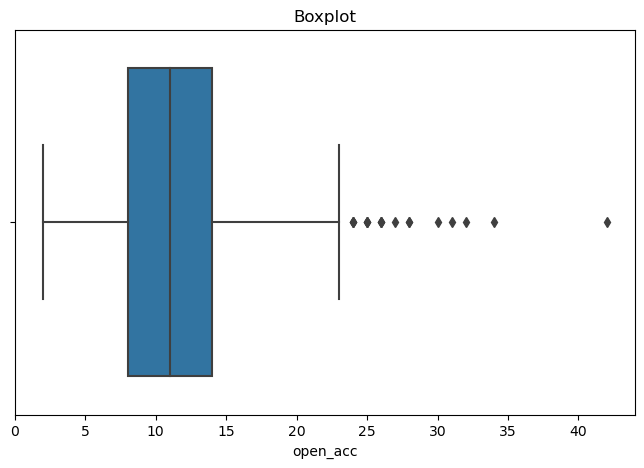

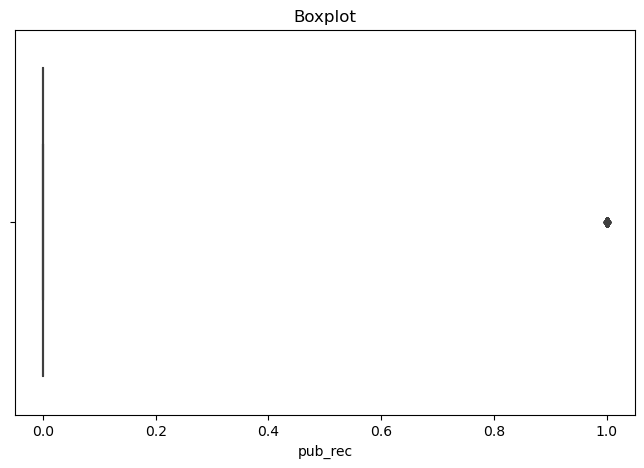

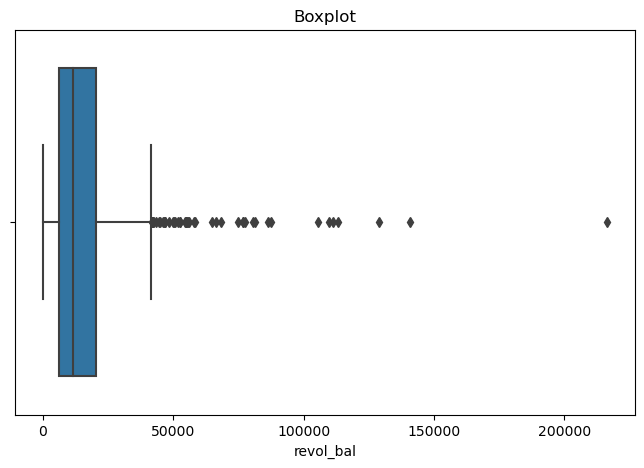

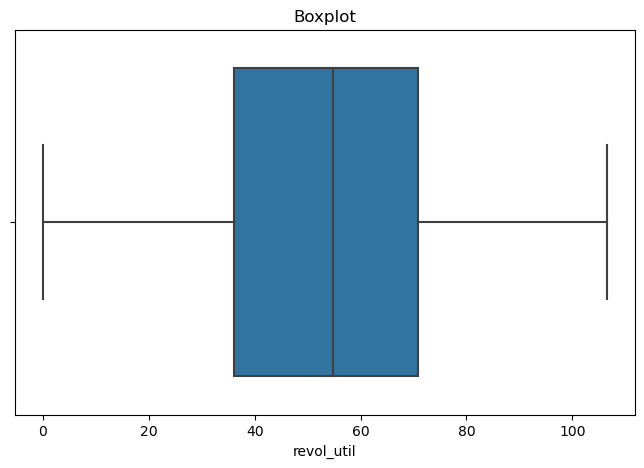

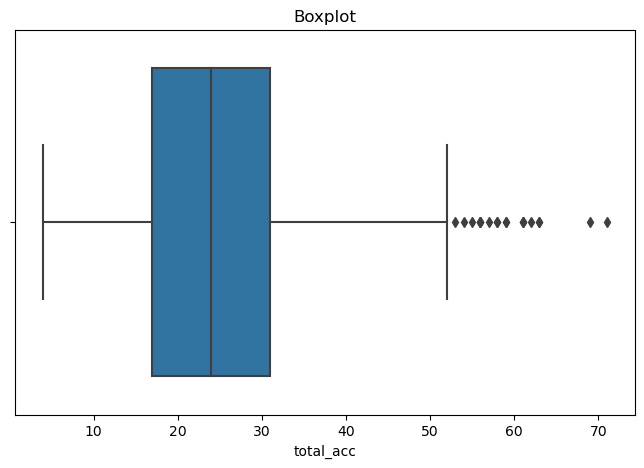

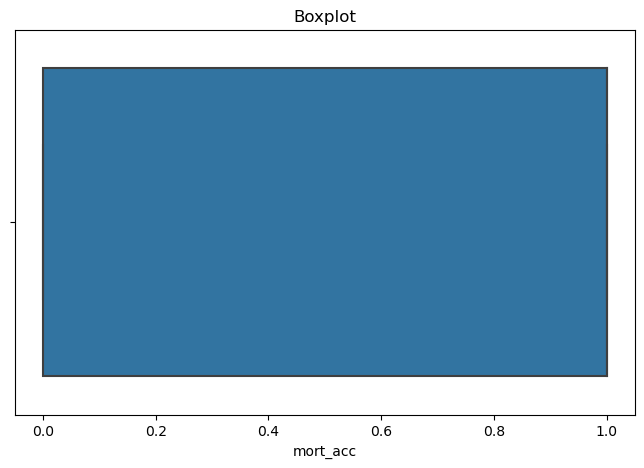

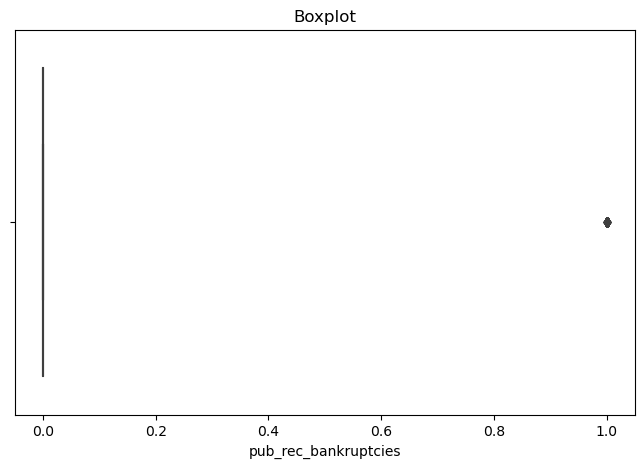

In [50]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=data[col])
    plt.title('Boxplot')
    plt.show()
    
for col in num_cols:
    box_plot(col)

In [51]:
for col in num_cols:
    mean=data[col].mean()
    std=data[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    data=data[(data[col]<upper_limit) & (data[col]>lower_limit)]
    
data.shape

(890, 26)

## Data Preprocesing 

In [52]:
# Term
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [53]:
term_values={' 36 months': 36, ' 60 months':60}
data['term'] = data.term.map(term_values)

In [54]:
# Initial List Status
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [55]:
list_status = {'w': 0, 'f': 1}
data['initial_list_status'] = data.initial_list_status.map(list_status)

In [56]:
# Let's fetch ZIP from address and then drop the remaining details -
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [57]:
data['zip_code'].value_counts(normalize=True)*100

70466    15.955056
22690    14.269663
30723    14.157303
29597    12.696629
48052    12.584270
05113    11.460674
00813    11.123596
93700     2.808989
11650     2.584270
86630     2.359551
Name: zip_code, dtype: float64

In [58]:
# Dropping some variables which we can let go for now 
data.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'], 
                   axis=1, inplace=True)

## One-hot Encoding 

In [59]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
data=pd.get_dummies(data,columns=dummies,drop_first=True)

In [60]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

data.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_JOINT,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [61]:
data.shape

(890, 46)

## Data Preparation for Modelling

In [62]:
X=data.drop('loan_status',axis=1)
y=data['loan_status']

In [63]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)

(623, 45)
(267, 45)


## MinMaxScaler -

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Logistic Regression

In [74]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [75]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.903


## Confusion Matrix

In [76]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[218   0]
 [ 26  23]]


## Classification Report

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       218
           1       1.00      0.47      0.64        49

    accuracy                           0.90       267
   macro avg       0.95      0.73      0.79       267
weighted avg       0.91      0.90      0.89       267



## ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

* TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

* FPR=(FP)/(FP+TN)


An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

## AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions.

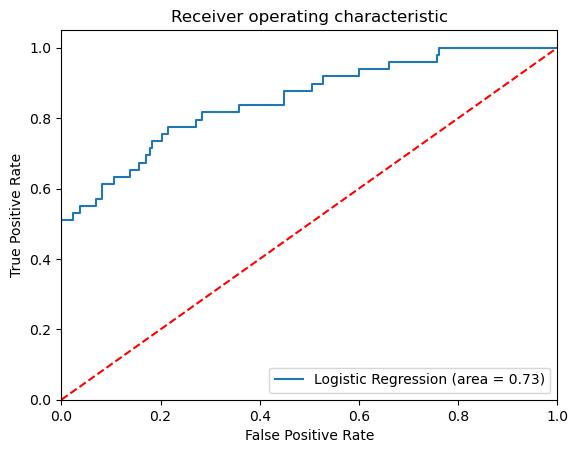

In [78]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

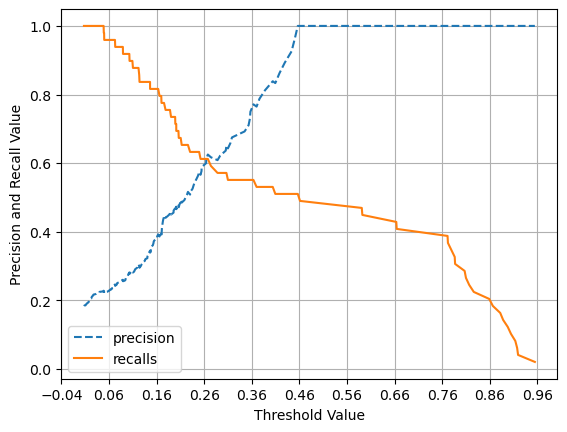

In [79]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,logreg.predict_proba(X_test)[:,1])

## Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF. In VIF method, we pick each independent feature and regress it against all of the other independent features. VIF score of an independent variable represents how well the variable is explained by other independent variables.

* VIF = 1/1-R2

In [80]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
2,int_rate,105.48
14,purpose_debt_consolidation,27.75
1,term,26.41
5,open_acc,15.62
9,total_acc,14.08


In [81]:
X.drop(columns=['application_type_INDIVIDUAL'],axis=1,inplace=True)
calc_vif(X)[:5]

KeyError: "['application_type_INDIVIDUAL'] not found in axis"

In [82]:
X.drop(columns=['int_rate'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,term,25.75
13,purpose_debt_consolidation,23.15
4,open_acc,15.34
8,total_acc,14.06
7,revol_util,10.08


In [83]:
X.drop(columns=['term'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
12,purpose_debt_consolidation,18.73
3,open_acc,15.32
7,total_acc,14.04
6,revol_util,10.08
1,annual_inc,9.10


In [84]:
X.drop(columns=['purpose_debt_consolidation'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
3,open_acc,14.46
7,total_acc,14.04
6,revol_util,9.14
1,annual_inc,8.71
2,dti,8.29


In [85]:
X.drop(columns=['open_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
6,total_acc,9.34
5,revol_util,8.76
1,annual_inc,8.53
2,dti,7.56
0,loan_amnt,7.08


In [89]:
X=scaler.fit_transform(X)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(logreg,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.893


## Oversampling using SMOTE

In [90]:
sm = SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

NameError: name 'SMOTE' is not defined

In [91]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

NameError: name 'X_train_res' is not defined

In [92]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# Classification Report
print(classification_report(y_test, predictions))

NameError: name 'X_train_res' is not defined

In [93]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## How to Detect Real Defaulters and Reduce False Positives

Reducing false positives (approving loans for individuals who might default) and accurately identifying real defaulters is crucial in the lending industry. Here are several strategies to achieve this:

#### 1.  Feature Selection and Engineering:

* Identify and use relevant features that are strong indicators of creditworthiness, such as credit score, income stability, debt-to-income ratio, and employment history.
* Create new features that might have predictive power, such as the length of credit history or the number of open credit lines.

#### 2.  Advanced Modeling Techniques:
 

* Use advanced machine learning algorithms that handle imbalanced datasets well, such as ensemble methods like Random Forest and Gradient Boosting.
* Implement techniques like SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class (defaulters) and balance the dataset.

#### 3. Tuning Model Parameters:

* Tune model hyperparameters to improve performance, especially focusing on parameters related to handling class imbalance.
* Utilize techniques like Grid Search or Randomized Search to find the best hyperparameters.

#### 4. Evaluation Metrics: 

* Use appropriate evaluation metrics, such as precision, recall, F1-score, and ROC-AUC, rather than accuracy.
* Focus on maximizing recall to minimize false negatives while keeping precision reasonably high to avoid excessive false positives.

#### 5.  Regular Monitoring and Updating:

* Regularly monitor the model's performance and update it as the lending landscape changes.
* Implement feedback loops where real-world outcomes are used to retrain and recalibrate the model.

# Playing Safe and Avoiding Loans to High-Risk Applicants:

#### 1. Strict Approval Criteria:

* Establish stringent approval criteria based on thorough analysis of historical default data.
* Avoid lending to individuals with a history of multiple late payments or bankruptcies.

#### 2. Regulatory Compliance: 

* Adhere to regulatory guidelines and industry best practices to ensure responsible and legal loan disbursal.
* Stay updated with the latest regulations related to lending practices.

#### 3. Use of Alternative Data: 

* Incorporate alternative data sources, such as social media profiles or utility bill payment history, to assess creditworthiness.

#### 4. Continuous Risk Assessment: 

* Implement continuous risk assessment mechanisms that monitor borrowers' financial behavior even after loan approval.
* Utilize modern technologies like machine learning algorithms to detect early signs of financial distress among borrowers.

#### 5. Collaborate with Credit Bureaus: 

* Collaborate with credit bureaus to access comprehensive credit reports and credit scores for a more accurate assessment of applicants' creditworthiness.

## Insights

1. The majority of the home ownership status provided by the borrower during registration or obtained from the credit report is MORTGAGE.
2. The largest number of people were assigned to the B group by LOANTAP.
3. The popular loan term is 36 months.
4. More loans were approved for people with the longest employment years.
5. TEACHER & MANAGER were awarded more loans. The accuracy after oversampling using SMOTE is 80%

## Recommendations

1. Provide more options for the term period so customers can make payments according to their incomes.
2. Give an equal number of loans to high-paying job title customers; expectations for full payment can be higher.
3. Approve loans for EDUCATION, MEDICAL & other important purposes with Strict Approval Criteria to create loyalty with customers with the bank.